# ***Attribute Information:***



* Id number:  1 to 214 (removed from CSV file)
* RI: refractive index
* Na: Sodium (unit measurement: weight percent in corresponding oxide, as are attributes 4–10)
* Mg: Magnesium
* Al: Aluminum
* Si: Silicon
* K: Potassium
* Ca: Calcium
* Ba: Barium
* Fe: Iron
* Type of glass: (class attribute)
    - building windows float processed
    - building windows non-float processed
    - vehicle windows float processed
    - vehicle windows non-float processed (none in this database)
    - containers
    - tableware
    - headlamps

# ***Import Libraries***

In [30]:
import numpy as np
import matplotlib.pyplot as plt 

import pandas as pd  
import seaborn as sns 

%matplotlib inline

# ***Loading the data from the csv file***

In [31]:
data = pd.read_csv("glass.csv")

# displaying the first five rows from the dataset
data.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.0,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.0,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.0,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.0,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.0,0.0,1


# ***Normalizing the variables***

In [32]:
from sklearn.preprocessing import StandardScaler

# Standardize features by removing the mean and scaling to unit variance.
scaler = StandardScaler()

# Computes the mean and std to be used for later scaling.
scaler.fit(data.drop('Type', axis=1))

# Perform standardization by centering and scaling.
scaled_features = scaler.transform(data.drop('Type', axis=1))

# constructing DataFrame
df_feat = pd.DataFrame(scaled_features, columns=data.columns[:-1])

# displaying the first five rows
df_feat.head()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe
0,0.872868,0.284953,1.254639,-0.692442,-1.127082,-0.671705,-0.145766,-0.352877,-0.586451
1,-0.249333,0.591817,0.636168,-0.170460,0.102319,-0.026213,-0.793734,-0.352877,-0.586451
2,-0.721318,0.149933,0.601422,0.190912,0.438787,-0.164533,-0.828949,-0.352877,-0.586451
3,-0.232831,-0.242853,0.698710,-0.310994,-0.052974,0.112107,-0.519052,-0.352877,-0.586451
4,-0.312045,-0.169205,0.650066,-0.411375,0.555256,0.081369,-0.624699,-0.352877,-0.586451


# ***Train Test Split***

In [33]:
from sklearn.model_selection import train_test_split 

#Split data into random train and test subsets
X_train, X_test, y_train, y_test = train_test_split(scaled_features,data['Type'], test_size=0.30, random_state=42)

# ***Selecting the K value***

In [34]:
from sklearn.neighbors import KNeighborsClassifier

error_rate = []
# Can take some time.
for i in range(1,10):
    # Classifier implementing the k-nearest neighbors vote.
    knn = KNeighborsClassifier(n_neighbors=i)

    # Fit the k-nearest neighbors classifier from the training dataset.
    knn.fit(X_train,y_train)

    # Predict the class labels for the X_test.
    predicted_i = knn.predict(X_test)

    error_rate.append(np.mean(predicted_i != y_test))

# *displaying the error rate for different values of K*

Text(0, 0.5, 'Error Rate')

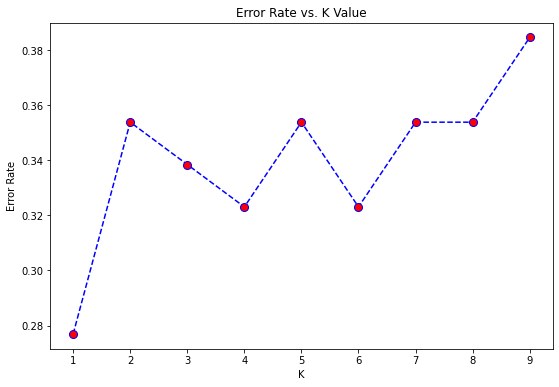

In [40]:

plt.figure(figsize=(9,6))
plt.plot(range(1,10),error_rate,color='blue', linestyle='dashed', marker='o',markerfacecolor='red', markersize=8)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

# ***Model Prediction and Evaluation***

In [36]:
# Classifier implementing the k-nearest neighbors vote.
knn = KNeighborsClassifier(n_neighbors=1)

# Fit the k-nearest neighbors classifier from the training dataset.
knn.fit(X_train,y_train)

# Predict the class labels for the X_test.
pred = knn.predict(X_test)

In [37]:
from sklearn.metrics import classification_report,confusion_matrix

print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

[[16  2  1  0  0  0]
 [ 6 15  1  0  1  0]
 [ 1  1  2  0  0  0]
 [ 0  4  0  2  0  0]
 [ 0  0  0  0  3  0]
 [ 0  0  0  0  1  9]]


              precision    recall  f1-score   support

           1       0.70      0.84      0.76        19
           2       0.68      0.65      0.67        23
           3       0.50      0.50      0.50         4
           5       1.00      0.33      0.50         6
           6       0.60      1.00      0.75         3
           7       1.00      0.90      0.95        10

    accuracy                           0.72        65
   macro avg       0.75      0.70      0.69        65
weighted avg       0.75      0.72      0.72        65

